 # TITANIC

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read data as df
df = pd.read_csv('titanic_train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

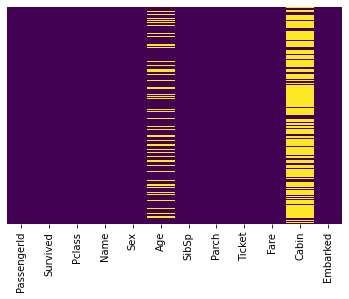

In [4]:
#to check for missing values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll drop this later

In [5]:
#to check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#checking for duplicate
df.duplicated().sum()

0

In [7]:
#to generate the descriptive statistics.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA CLEANING

In [9]:
#replace the abbreviation to the cities
df['Embarked'].replace({'C':'Cherbourg','Q':'Queenstown', 'S':'Southampton'},inplace = True)

In [10]:
#dropping ticket and Cabin because its not important in the analysis and the cabin column as a lot of missing values
df.drop(columns =['Ticket','Cabin'],inplace = True)

In [11]:
#FILLING NAN IN AGE COLUMN WITH THE MEAN AGE
Ave_age = df['Age'].mean()
Ave_age

29.69911764705882

In [12]:
values = Ave_age
df['Age'].fillna(value= values,inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,Cherbourg


In [13]:
 #converting the age to integer
df['Age'] = df['Age'].astype(int)

In [14]:
#confirming the change
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,Cherbourg


In [15]:
#replacing the nan in embarked column with the mode
embarked =df['Embarked'].mode()
embarked

0    Southampton
Name: Embarked, dtype: object

In [16]:
#replacing with Southampton which occurred most
df['Embarked'].fillna(value= 'Southampton',inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,Cherbourg


In [17]:
#reconfirm Nan
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [18]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


In [47]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

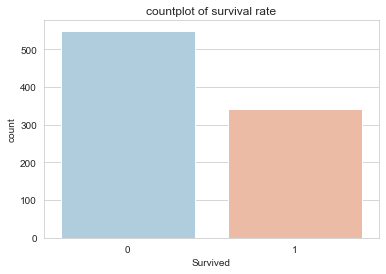

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')
plt.title('countplot of survival rate')
plt.show()

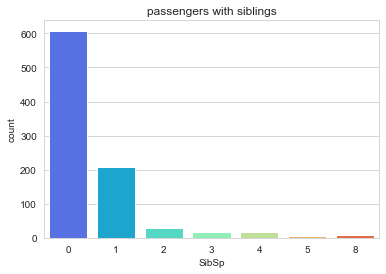

In [49]:
sns.countplot(x='SibSp',data =df,palette = 'rainbow')
plt.title('passengers with siblings')
plt.show()

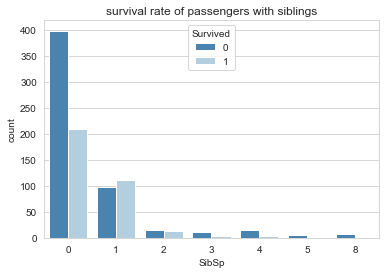

In [51]:
sns.countplot(x='SibSp',hue = 'Survived',data =df,palette = 'Blues_r')
plt.title('survival rate of passengers with siblings')
plt.show()

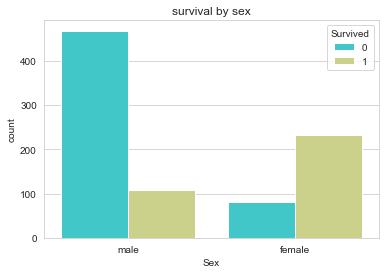

In [52]:
sns.countplot(x='Sex',hue = 'Survived',data =df,palette = 'rainbow')
plt.title('survival by sex')
plt.show()

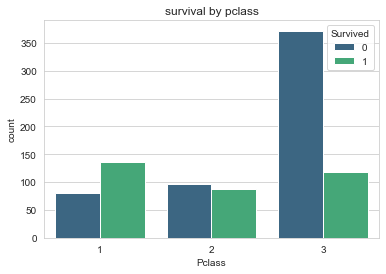

In [53]:
sns.countplot(x='Pclass',hue = 'Survived',data =df,palette = 'viridis')
plt.title('survival by pclass')
plt.show()

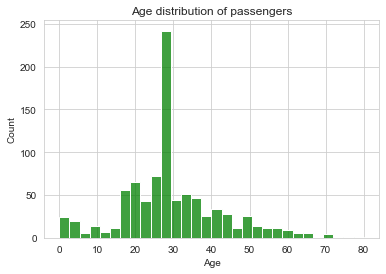

In [54]:
sns.histplot(df['Age'],color = 'Green')
plt.title('Age distribution of passengers')
plt.show()

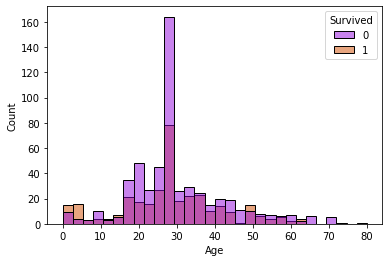

In [25]:
sns.histplot(x='Age',hue = 'Survived',data =df,palette = 'gnuplot')
plt.show()

Majority of the people that survived are children and older people

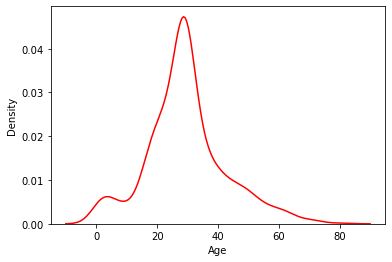

In [19]:
#to check for age distribution of passengers
sns.kdeplot(x='Age',data=df,color='red');

In [20]:
#subset of survived passengers
survival = df[df['Survived']==1]
survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,Cherbourg
...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,7.2250,Cherbourg
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,83.1583,Cherbourg
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,26.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,Southampton


In [28]:
df['Age'].value_counts().sort_values(ascending=False).head(10)

29    197
24     31
22     27
30     27
28     27
18     26
19     25
21     24
36     23
25     23
Name: Age, dtype: int64

In [29]:
#checking the age of those that survived
age_surv= survival['Age'].value_counts().sort_values(ascending=False).head(10)
age_surv

29    60
24    15
35    11
27    11
22    11
36    11
30    10
32    10
19     9
18     9
Name: Age, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

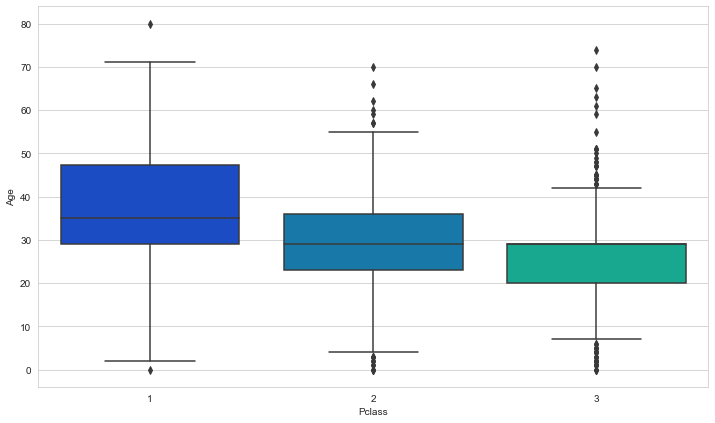

In [56]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

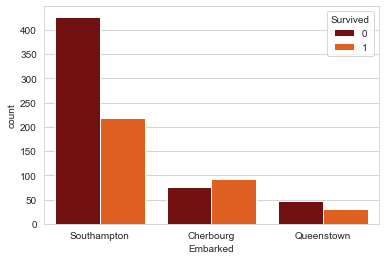

In [57]:
sns.countplot(x='Embarked',hue = 'Survived',data =df,palette = 'gist_heat')
plt.show()

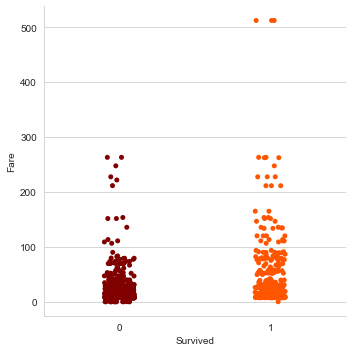

In [60]:
sns.catplot(x ='Survived',y= 'Fare',data =df,palette = 'gist_heat')
plt.show()

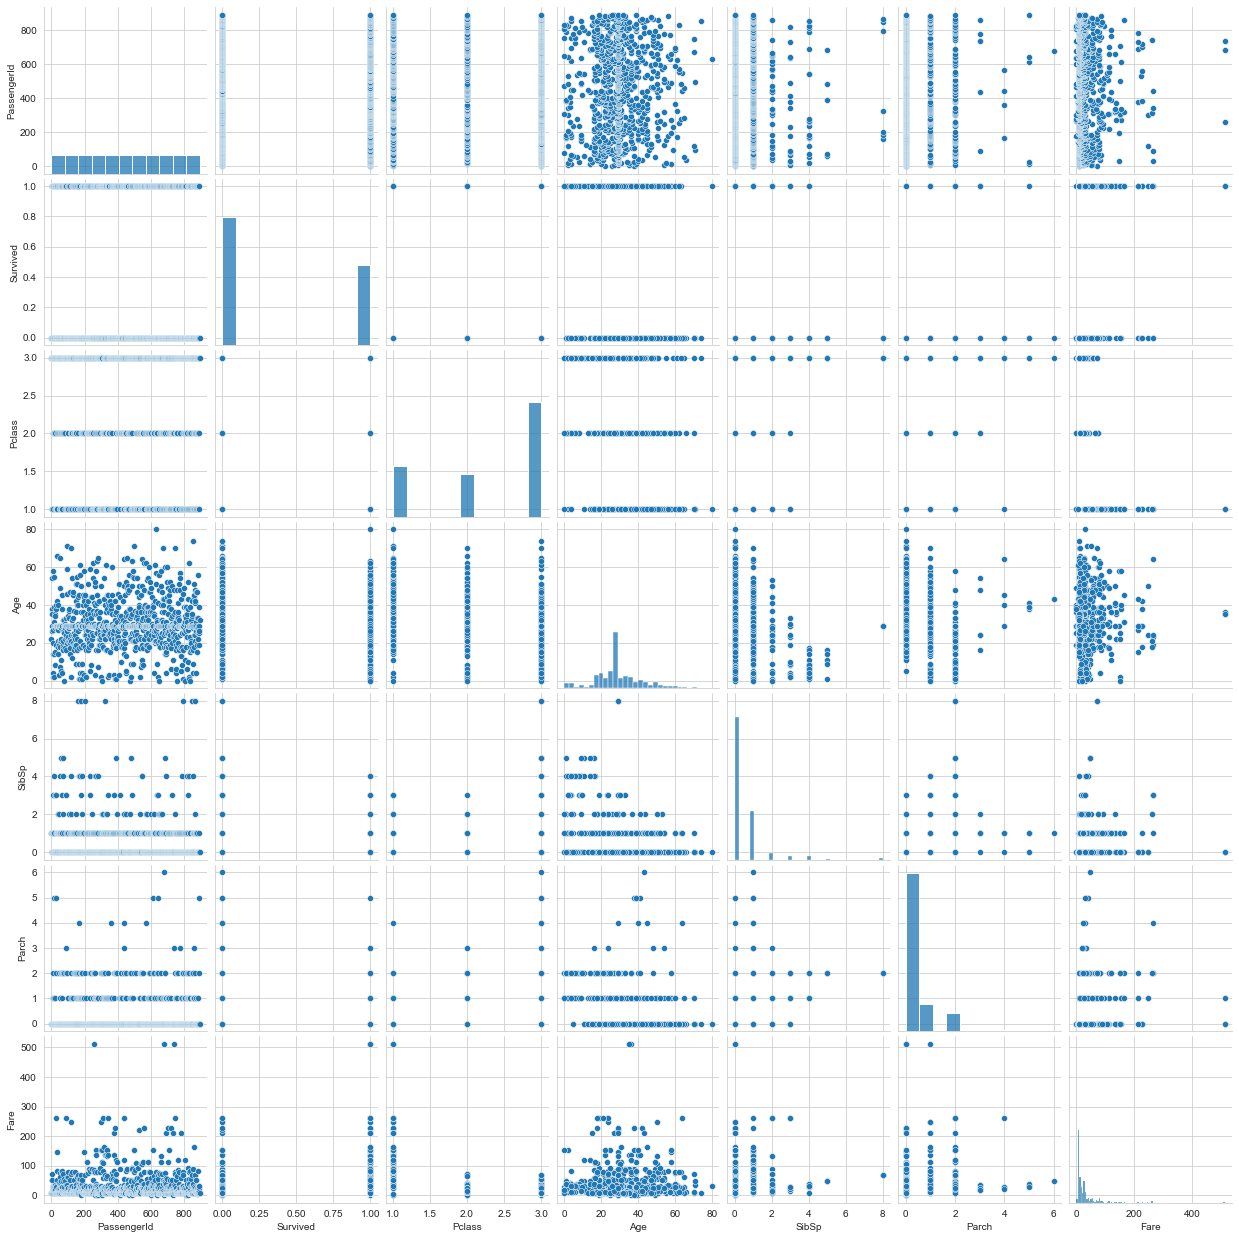

In [61]:
sns.pairplot(df)

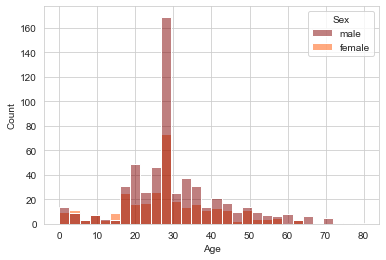

In [62]:
sns.histplot(x='Age',hue = 'Sex',data =df,palette = 'gist_heat')
plt.show()

In [64]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

majority of the passengers travelled alone

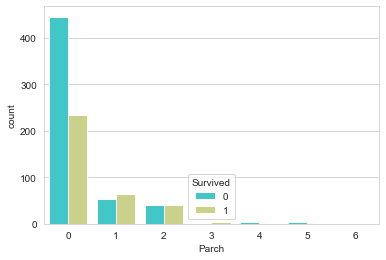

In [65]:
sns.countplot(x='Parch',hue = 'Survived',data =df,palette = 'rainbow')
plt.show()

most people that survived travelled alone

# Machine Learning

In [66]:
dummies = pd.get_dummies(df['Embarked'])
dummies

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [67]:
dummies2 = pd.get_dummies(df['Sex'])
dummies2

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [68]:
merged = pd.concat([df,dummies,dummies2],axis = 1)
merged 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cherbourg,Queenstown,Southampton,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Southampton,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,Cherbourg,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Southampton,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,Southampton,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Southampton,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,Southampton,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,Southampton,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,Southampton,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,Cherbourg,1,0,0,0,1


In [69]:
X = merged .drop(columns =['Sex','Embarked','PassengerId','Name','Survived','male','Southampton'])
X

,Pclass,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,female
0,3,22,1,0,7.2500,0,0,0
1,1,38,1,0,71.2833,1,0,1
2,3,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,0,0,1
4,3,35,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,0,0
887,1,19,0,0,30.0000,0,0,1
888,3,29,1,2,23.4500,0,0,1
889,1,26,0,0,30.0000,1,0,0


In [70]:
y= df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
#import libraries for machine learning
from sklearn.model_selection import train_test_split

In [72]:
X_train,x_test,y_train,y_test =train_test_split(X,y,test_size = 0.3,random_state = 2)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [75]:
logreg.fit(X_train,y_train)

C:\Users\Vineyard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
logreg.predict(X_train)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
logreg.score(X_train,y_train)

0.8105939004815409

X_train

In [78]:
X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,female
451,3,29,1,0,19.9667,0,0,0
345,2,24,0,0,13.0000,0,0,1
687,3,19,0,0,10.1708,0,0,0
279,3,35,1,1,20.2500,0,0,1
742,1,21,2,2,262.3750,1,0,1
771,3,48,0,0,7.8542,0,0,0
490,3,29,1,0,19.9667,0,0,0
638,3,41,0,5,39.6875,0,0,1
375,1,29,1,0,82.1708,1,0,1
312,2,26,1,1,26.0000,0,0,1


# CLASSIFICATION

In [79]:
from sklearn.metrics import classification_report

In [80]:
predictions =logreg.predict(X_train)

In [81]:
print(classification_report(predictions,y_train))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       407
           1       0.71      0.77      0.74       216

    accuracy                           0.81       623
   macro avg       0.79      0.80      0.79       623
weighted avg       0.82      0.81      0.81       623

